# HOUSE PRICE PREDICTION

 IMPORTING NECESSARY PACKAGES

In [942]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

READING THE DATA

In [943]:
df=pd.read_csv("D:\\python\\train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [944]:
#checking the size of the dataset
shape=df.shape
shape

(7109, 22)

In [945]:
print("There are",shape[1],"columns and",shape[0],"records in the dataset")

There are 22 columns and 7109 records in the dataset


In [946]:
#viewing the column names
columns=df.columns
columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# DATA CLEANING AND PREPROCESSING

CHECKING FOR MISSING VALUES

In [947]:
#finding the null values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [948]:
# #finding the percentage of missing data
# percentage=df.isnull().sum()*100/len(df)
# percentage

HANDLIND THE MISSING VALUES

In [949]:
#viewing the missing values of "N_BEDROOM" feature          
df[df["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [950]:
#imputing the missing value of "N_BEDROOM" by filling using mode(most frequently occured value)
df["N_BEDROOM"]=df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode())

In [951]:
#viewing the missing value of "N_BATHROOM"
df[df["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [952]:
#imputing the missing value of "N_BATHROOM" by filling using mode(most frequently occured value)
df["N_BATHROOM"]=df["N_BATHROOM"].fillna((df["N_BATHROOM"].mode()))

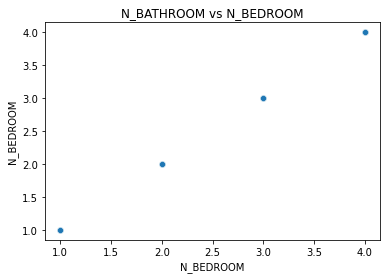

In [953]:
# alternative way to impute
sns.scatterplot(x="N_BEDROOM",y="N_BEDROOM",data=df).set(title="N_BATHROOM vs N_BEDROOM");

In [954]:
# correlation=np.corrcoef(df["N_BEDROOM"],df["N_BATHROOM"])
# print(correlation)
# #since N_BATHROOM AND N_BEDROOM  are related to each other, we can impute from each other
# for i in range(len(df)):
#     df["N_BEDROOM"]=df["N_BEDROOM"].fillna(df["N_BATHROOM"][i])
    
# for i in range(len(df)):
#     df["N_BATHROOM"]=df["N_BATHROOM"].fillna(df["N_BEDROOM"][i])

In [955]:
#dropping all the missing value of "QS_OVERALL" because it is a masked data,so we cant impute
df=df.dropna()

In [956]:
#alternative way,we can impute "QS_OVERALL" by calculation the mean of that feature
# df["QS_OVERALL"]=df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean())

In [957]:
#viewing the size of the data after handling the missing values
df.shape

(7056, 22)

CHECKING FOR CORRECT DATATYPES

In [958]:
#viewing the datatypes
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [959]:
#changing the type of "DATE_SALE" and "DATE_BUILD" to datetime type
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])

In [960]:
#chaning the type of "N_BEDROOM" and "N_BATHROOM" from float to int
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int64")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int64")

In [961]:
#viewing the number of types of data in the dataset
df.dtypes.value_counts()

object            8
int64             8
float64           4
datetime64[ns]    2
dtype: int64

CHECKING FOR DUPLICATE VALUES

In [962]:
#viewing duplicate values
df.duplicated().sum()

0

In [963]:
#viweing the STATISTICAL information of the dataset
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


CHECKING FOR OUTLIERS

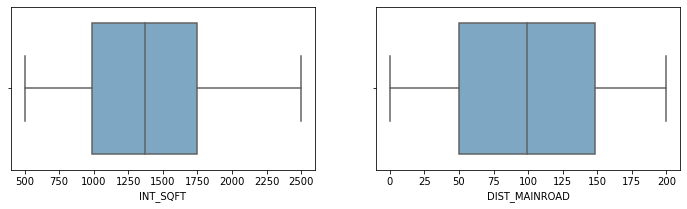

In [964]:
#ploting boxplot to view if any outlier is present in the feature "INT_SQFT" and "DIST_MAINROAD"
fig,axis=plt.subplots(1,2,figsize=(12,3))
sns.boxplot(df["INT_SQFT"],palette="PuBu",ax=axis[0]);
sns.boxplot(df["DIST_MAINROAD"],palette="PuBu",ax=axis[1]);
plt.show()

No outliers were found in the feature 'INT_SQFT' and 'DIST_MAINROAD' 

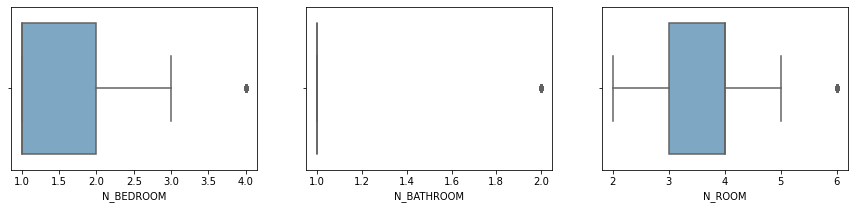

In [965]:

#viewing if any outlier is presnt in the feature "N_BEDROOM", "N_BATHROOM", "N_ROOM" using boxplot
fig,axis=plt.subplots(1,3,figsize=(15,3))
sns.boxplot(df["N_BEDROOM"],palette="PuBu",ax=axis[0])
sns.boxplot(df["N_BATHROOM"],palette="PuBu",ax=axis[1])
sns.boxplot(df["N_ROOM"],palette="PuBu",ax=axis[2])
plt.show()

In these three above feaatures outliers were found,but outlier will not be a problem in this case.

In [966]:
max_N_BEDROOM=df["N_BEDROOM"].max()
print("In 'N_BEDROOM' the outlier will not be a problem because the maximum value of 'N_BEDROOM' is",max_N_BEDROOM,",in a house number of bedrooms can be ",max_N_BEDROOM)
print("In 'N_BATHROOM' also outlier will not be a problem")
max_N_ROOM=df["N_ROOM"].max()
print("In 'N_ROOM' the outlier will not be a problem because the maximum value of 'N_ROOM' is",max_N_ROOM,",in a house number of rooms can be ",max_N_ROOM)

In 'N_BEDROOM' the outlier will not be a problem because the maximum value of 'N_BEDROOM' is 4 ,in a house number of bedrooms can be  4
In 'N_BATHROOM' also outlier will not be a problem
In 'N_ROOM' the outlier will not be a problem because the maximum value of 'N_ROOM' is 6 ,in a house number of rooms can be  6


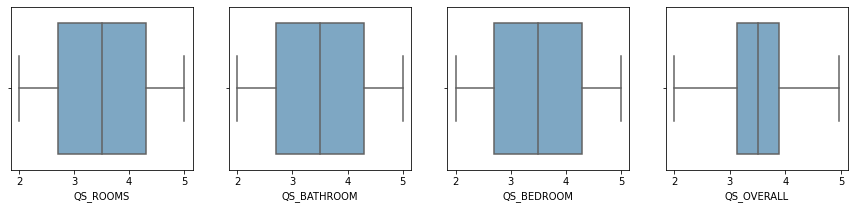

In [967]:
#checking if any outlier is present using boxplot to the features "QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"
fig,axis=plt.subplots(1,4,figsize=(15,3))
sns.boxplot(df["QS_ROOMS"],palette="PuBu",ax=axis[0])
sns.boxplot(df["QS_BATHROOM"],palette="PuBu",ax=axis[1])
sns.boxplot(df["QS_BEDROOM"],palette="PuBu",ax=axis[2])
sns.boxplot(df["QS_OVERALL"],palette="PuBu",ax=axis[3])
plt.show()

No outlier were found in the above four features

CHECKING THE TEXTUAL DATA

In [968]:
#viewing the textual data
df["AREA"].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [969]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"KKNagar":"KK Nagar","Adyr":"Adyar","Ann Nagar":"Anna Nagar","Karapakam":"Karapakkam","Chormpet":"Chrompet","TNagar":"T Nagar","Chrmpet":"Chrompet","Chrompt":"Chrompet","Velchery":"Velachery","Ana Nagar":"Anna Nagar"})

In [970]:
df["SALE_COND"].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [971]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"PartiaLl":"Partial","Partiall":"Partial","Ab Normal":"AbNormal","Adj Land":"AdjLand"})

In [972]:
df["PARK_FACIL"].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [973]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"Noo":"No"})

In [974]:
df["BUILDTYPE"].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [975]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"Comercial":"Commercial","Other":"Others"})

In [976]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [977]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"AllPub":"All Pub"})

In [978]:
df["STREET"].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [979]:
#replacing the incorrect spelling with correct spelling
df=df.replace({"NoAccess":"No Access","Pavd":"Paved"})

In [980]:
df["MZZONE"].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [981]:
#imputing a fetaure from the existing features
#calculating the age of building from the features "DATE_SALE" and "DATE_BUILD"
df["AGE_OF_BUILDING"]=df["DATE_SALE"].dt.year-df["DATE_BUILD"].dt.year

# DATA VISUALISATION

distribution of all categorical data

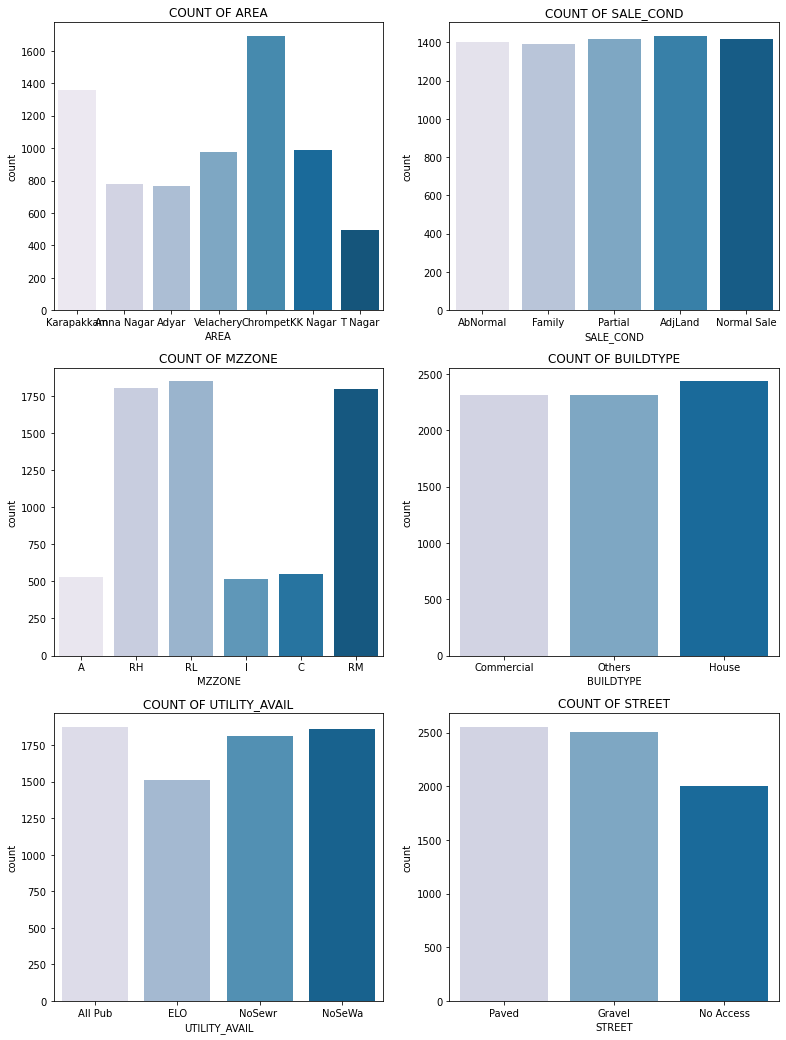

In [982]:
# viewing the distribution of the features AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
fig,axis=plt.subplots(3,2,figsize=(13,18))
sns.countplot(df["AREA"],ax=axis[0][0],palette="PuBu").set(title="COUNT OF AREA")
sns.countplot(df["SALE_COND"],ax=axis[0][1],palette="PuBu").set(title="COUNT OF SALE_COND")
sns.countplot(df["MZZONE"],ax=axis[1][0],palette="PuBu").set(title="COUNT OF MZZONE")
sns.countplot(df["BUILDTYPE"],ax=axis[1][1],palette="PuBu").set(title="COUNT OF BUILDTYPE")
sns.countplot(df["UTILITY_AVAIL"],ax=axis[2][0],palette="PuBu").set(title="COUNT OF UTILITY_AVAIL")
sns.countplot(df["STREET"],ax=axis[2][1],palette="PuBu").set(title="COUNT OF STREET")
plt.show()

1.This plot shows the counts of houses in differetnt "AREA",by seeing the plot we can say that 'chrompet' have high count followed by 'karapakkam', followed by 'KK Nagar' and followed by others.

2.This plot shows the counts of houses based on the "CONDITION" of house,by seeing the graph we can say that all category in this feature are almost equally distributed.

3.This plot shows the count of the houses based on their "ZONE".
by seeing this plot we can say that all the "residentaial density zone"(RH,RM,RL) are high in count, followed by "commercial"and others.

4.This plot shows the count of houses based on the category "BUILDTYPE",from this plot we can see that all category in this feature are almost equally distributed.

5.This bar plot shows the count of houses based on their "UTILITY" available for the house,by seeing the graph we can say that count of houses having all public utilities are more in number followed by others.

6.This plot shows the count of houses based on which "STREET" the house belong to,be seeing the plot we can say that number of house in the "paved" street are more, then followed others.

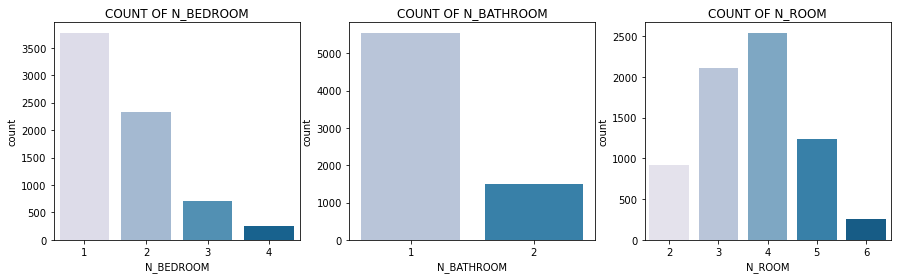

In [983]:
fig,axis=plt.subplots(1,3,figsize=(15,4))
sns.countplot(df["N_BEDROOM"],ax=axis[0],palette="PuBu").set(title="COUNT OF N_BEDROOM");
sns.countplot(df["N_BATHROOM"],palette="PuBu",ax=axis[1]).set(title="COUNT OF N_BATHROOM");
sns.countplot(df["N_ROOM"],ax=axis[2],palette="PuBu").set(title="COUNT OF N_ROOM");

1.In the 1st graph, houses with 1 bedrooms are higher followed by 2 and so on to 4 bedrooms.

2.In the 2nd graph, houses with 1 bathroom are high in count followed by 2 bathrooms

3.In the 3rd graph, count of houses with 4 total rooms are high, followed by 3 total rooms,then 5 total rooms and the followed by 2 and 6 rooms.

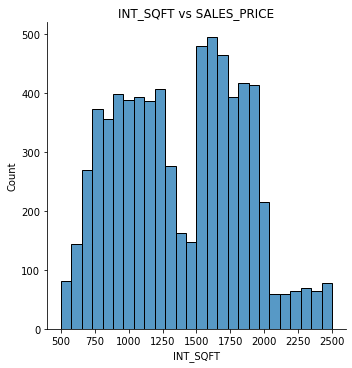

In [984]:
#viewing the distribution of the values of NUMERICAL VALUES
sns.displot(df["INT_SQFT"],ax=axis[0]).set(title="INT_SQFT vs SALES_PRICE");

From the above graph,we can infer that most count of houses have square_feet(INT_SQFT) ranging 1600-1750 

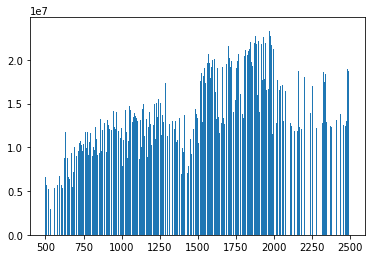

In [985]:
plt.bar(df["INT_SQFT"],df["SALES_PRICE"]);

by seeing the graph we can analyse that sqfeet(INT_SQFT) of range 1750-2000 have the hightest sales

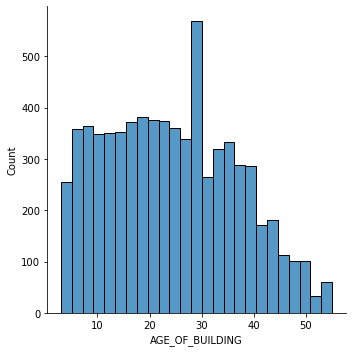

In [986]:
#viweing the distribution of AGE_OF_BUILDING
sns.displot(df["AGE_OF_BUILDING"],palette="PuBu");

By seeing the graph we can say that most of the buildings age lies between 27-30 years

# RELATIONSHIP WITH FEATURE AND TARGET

In [987]:
#spliting category columns and numeric columns
numeric_columns=[]
category_columns=[]
for i in df.columns:
    if df[i].dtypes=="int64":  
        numeric_columns.append(i)
    if df[i].dtypes=="float64":
        numeric_columns.append(i)
    if df[i].dtypes=="object":
        category_columns.append(i)

In [988]:
#finding correlatioon for numeric columns
corelation=[]
for i in numeric_columns:
    corelation.append(np.corrcoef(df[i],df["SALES_PRICE"])[0][1])
# corelations of all numeric feature with target
high_corr=dict(zip(numeric_columns,corelation))
print(high_corr)

{'INT_SQFT': 0.612668047499858, 'DIST_MAINROAD': 0.018062364700688133, 'N_BEDROOM': 0.33259544112922224, 'N_BATHROOM': 0.11098360367261528, 'N_ROOM': 0.6034168413043648, 'QS_ROOMS': 0.02227800382139674, 'QS_BATHROOM': -0.012345636059831723, 'QS_BEDROOM': 0.02007923784376821, 'QS_OVERALL': 0.02035211423695401, 'REG_FEE': 0.8782740699162728, 'COMMIS': 0.6272765963688073, 'SALES_PRICE': 1.0, 'AGE_OF_BUILDING': -0.1204182509392587}


In [989]:
#finding feature which have a linear relationship between the target
print("FEATURES HAVING LINEAR RELATIONSHIP WITH THE TARGET 'SALES_PRICE'\n")
for i in high_corr:
    if high_corr[i]>0.5 or high_corr[i]<-0.5 : 
        print("FEATURE:",i)
        print("correlation of",i,"with the target variable SALES_PRICE is:",high_corr[i])

FEATURES HAVING LINEAR RELATIONSHIP WITH THE TARGET 'SALES_PRICE'

FEATURE: INT_SQFT
correlation of INT_SQFT with the target variable SALES_PRICE is: 0.612668047499858
FEATURE: N_ROOM
correlation of N_ROOM with the target variable SALES_PRICE is: 0.6034168413043648
FEATURE: REG_FEE
correlation of REG_FEE with the target variable SALES_PRICE is: 0.8782740699162728
FEATURE: COMMIS
correlation of COMMIS with the target variable SALES_PRICE is: 0.6272765963688073
FEATURE: SALES_PRICE
correlation of SALES_PRICE with the target variable SALES_PRICE is: 1.0


RELATIONSHIP BETWEEN NUMERIC FEATURE AND TARGET

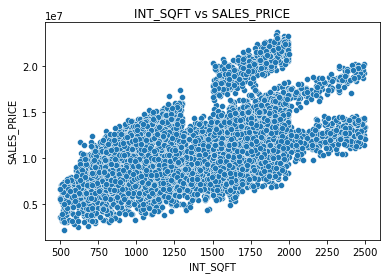

In [990]:
#plotting the relation between feature "INT_SQFT"  and the target "SALES_PRICE"
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",data=df).set(title="INT_SQFT vs SALES_PRICE");

By seeing the graph we can say that,there is a POSITIVE LINEAR relationship,coz as the "INT_SQFT" increases SALES_PRICE increases

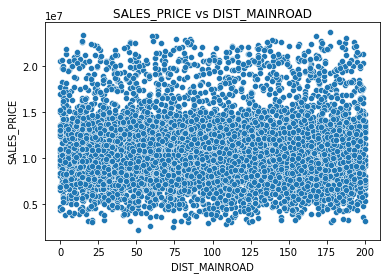

In [991]:
#plotting the relation between feature "DIST_MAINROAD"  and the target "SALES_PRICE"
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE",data=df).set(title="SALES_PRICE vs DIST_MAINROAD");

By seeing the graph we can say that there is NO relationship between the "SALES_PRECE and the feature "DIST_MAINROAD"

In [992]:
#finding the corelation between "DIST_MAINROAD"  and SALES_PRICE to see how strong the relationship is
correlation=np.corrcoef(df["DIST_MAINROAD"],df["SALES_PRICE"])
print("There is a NO CORRELATION and NO RELATIONSHIP beacuse the correlation coefficient value is: ",correlation[0][1])

There is a NO CORRELATION and NO RELATIONSHIP beacuse the correlation coefficient value is:  0.018062364700688133


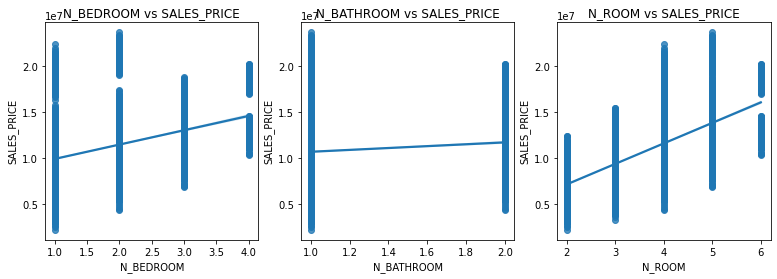

In [993]:
#plotting the relationship between "N_BEDROOM","N_BATHROOM","N_ROOM" and the target "SALES_PRICE"
fig,axis=plt.subplots(1,3,figsize=(13,4))
sns.regplot(x="N_BEDROOM",y="SALES_PRICE",data=df,ax=axis[0]).set(title="N_BEDROOM vs SALES_PRICE")
sns.regplot(x="N_BATHROOM",y="SALES_PRICE",data=df,ax=axis[1]).set(title="N_BATHROOM vs SALES_PRICE")
sns.regplot(x="N_ROOM",y="SALES_PRICE",data=df,ax=axis[2]).set(title="N_ROOM vs SALES_PRICE");

In [994]:
#finding the correlation of the features and the target to see how strong the relationship is
bed_room_cor=np.corrcoef(df["N_BEDROOM"],df["SALES_PRICE"])
print("1.N_BEDROOM has a LOW POSITIVE relationship beacuse as 'N_BEDROOM' increases 'SALES_PRICE' increases and the  the  correlation value is:",bed_room_cor[0][1],"\n")
bath_room_cor=np.corrcoef(df["N_BATHROOM"],df["SALES_PRICE"])
print("2.N_BATHROOM has a VERY LOW POSITIVE relationship beacuse as 'N_BATHROOM' increases 'SALES_PRICE' increases and the correlation value is:",bath_room_cor[0][1],"\n")
total_room_cor=np.corrcoef(df["N_ROOM"],df["SALES_PRICE"])
print("3.N_ROOM has a POSITIVE LINEAR relationship beacuse the as 'N_ROOM' increases 'SALES_PRICE' increases  and the correlation is:",total_room_cor[0][1],"which is greater than 0.5")

1.N_BEDROOM has a LOW POSITIVE relationship beacuse as 'N_BEDROOM' increases 'SALES_PRICE' increases and the  the  correlation value is: 0.33259544112922224 

2.N_BATHROOM has a VERY LOW POSITIVE relationship beacuse as 'N_BATHROOM' increases 'SALES_PRICE' increases and the correlation value is: 0.11098360367261528 

3.N_ROOM has a POSITIVE LINEAR relationship beacuse the as 'N_ROOM' increases 'SALES_PRICE' increases  and the correlation is: 0.6034168413043648 which is greater than 0.5


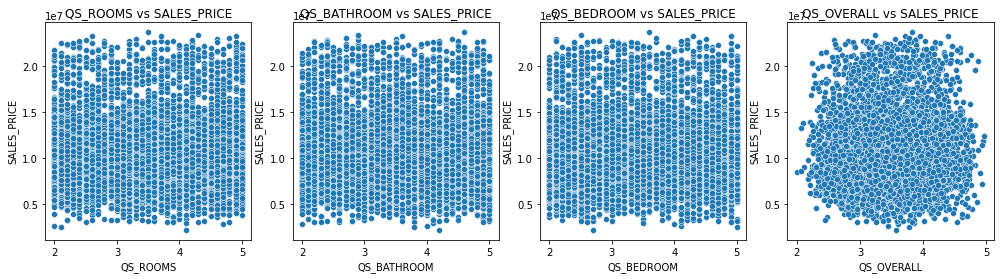

In [995]:
#plotting the relationship between "QS_ROOMS","QS_BATHROOM","QS_BEDROOM,"QS_OVERALL and the target "SALES_PRICE" 
fig,axis=plt.subplots(1,4,figsize=(17,4))
sns.scatterplot(x="QS_ROOMS",y="SALES_PRICE",data=df,palette="PuBu",ax=axis[0]).set(title="QS_ROOMS vs SALES_PRICE")
sns.scatterplot(x="QS_BATHROOM",y="SALES_PRICE",data=df,palette="PuBu",ax=axis[1]).set(title="QS_BATHROOM vs SALES_PRICE")
sns.scatterplot(x="QS_BEDROOM",y="SALES_PRICE",data=df,palette="PuBu",ax=axis[2]).set(title="QS_BEDROOM vs SALES_PRICE")
sns.scatterplot(x="QS_OVERALL",y="SALES_PRICE",data=df,palette="PuBu",ax=axis[3]).set(title="QS_OVERALL vs SALES_PRICE");

By seeing the graph we can say there is NO RELATIONSHIP between these four feature
'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL' and the target 'SALES_PRICE'.
We also cant transform these data because these data are masked data.
we can also srop these data,coz it have no relationship and it is masked

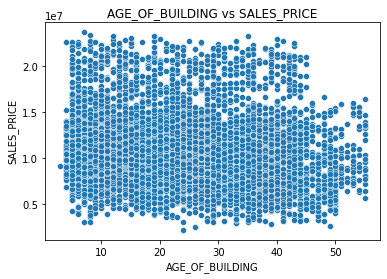

In [996]:
#plotting the relationship between "AGE_OF_BUILDING" and "SALES_PRICE"
sns.scatterplot(x="AGE_OF_BUILDING",y="SALES_PRICE",data=df).set(title="AGE_OF_BUILDING vs SALES_PRICE");

In [997]:
#finding the correlation of the feature and the target to see how strong the relationship is
build_age_cor=np.corrcoef(df["AGE_OF_BUILDING"],df["SALES_PRICE"])
print("AGE_OF_BUILDING has a LOW INVERSE(negative) RELATIONSHIP beacuse the correlation value is: ",build_age_cor[0][1],"which is        negative and lesser than -0.2")

AGE_OF_BUILDING has a LOW INVERSE(negative) RELATIONSHIP beacuse the correlation value is:  -0.1204182509392587 which is        negative and lesser than -0.2


 RELATIONSHIP BETWEEN CATEGORIC FEATAURE AND TARGET

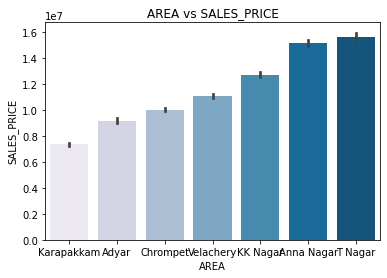

In [998]:
#viewing the relation between "AREA" and the target "SALES_PRICE"
orderdf=df.groupby(["AREA"])["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="AREA",y="SALES_PRICE",data=df,order=orderdf,palette="PuBu").set(title="AREA vs SALES_PRICE");

By seeing the graph we can infer that SALES_PRICE in "T Nagar" is HIGH, "velachery" area has a MEDIUM SALES_PRICE and "Karapakkam" area has the low SALES_PRICE compared to other AREA.

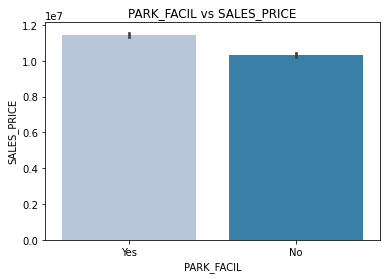

In [999]:
#viewing the relationship and distribution between "PARK_FACIL" feature and the target "SALES_PRICE"
sns.barplot(x="PARK_FACIL",y="SALES_PRICE",data=df,palette="PuBu").set(title="PARK_FACIL vs SALES_PRICE");

In [1000]:
#finding the corelation between the feature "PARK_FACIL" and the target "SALES_PRICE"
#converting categorical feature to numerical
cat_to_num_park=df["PARK_FACIL"].astype("category").cat.codes
#finding the corelation to see the relationship
park_cor=np.corrcoef(cat_to_num_park,df["SALES_PRICE"])
print("The feature 'PARK_FACIL' has a VERY LOW POSITIVE relationship towards the target 'SALES_PRICE' because the correlation value is",park_cor[0][1])

The feature 'PARK_FACIL' has a VERY LOW POSITIVE relationship towards the target 'SALES_PRICE' because the correlation value is 0.1469754778567808


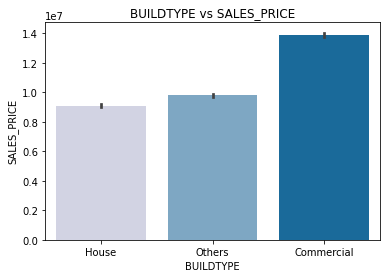

In [1001]:
#viewing the relationship and distribution between parking facility "BUILDTYPE" feature and the target "SALES_PRICE"
chart_df=df.groupby("BUILDTYPE")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu").set(title="BUILDTYPE vs SALES_PRICE");

By seeing the graph we can infer that "commercial" gives the high SALES_PRICE compared to other categories.

In [1002]:
#finding the corelation between the feature "PARK_FACIL" and the target "SALES_PRICE"
#converting categorical feature to numerical
cat_to_num_build=df["BUILDTYPE"].astype("category").cat.codes
#finding the corelation to see the relationship
build_cor=np.corrcoef(cat_to_num_build,df["SALES_PRICE"])
print("The feature 'BUILDTYPE' and the target 'SALES_PRICE' have a HIGH NEGATIVE(inverse) corelation,because the corelation is",build_cor[0][1])

The feature 'BUILDTYPE' and the target 'SALES_PRICE' have a HIGH NEGATIVE(inverse) corelation,because the corelation is -0.4373826804544969


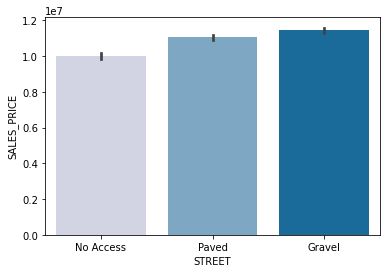

In [1003]:
#viewing the  relationship and distribution between parking facility "STREET" feature and the target "SALES_PRICE"
chart_df=df.groupby("STREET")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="STREET",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

By seeing the graph we can infer that, "Gravel" have the high SALES_PRICE comapred to other STREET

In [1004]:
#finding the corelation between the feature "STREET" and the target "SALES_PRICE"
#converting categorical feature to numerical
cat_to_num_street=df["STREET"].astype("category").cat.codes
#finding the corelation to see the relationship
street_cor=np.corrcoef(cat_to_num_street,df["SALES_PRICE"])
print("The feature 'STREET' and the target 'SALES_PRICE' have a  NO RELATIONSHIP,because corelation,cox the corelation is",street_cor[0][1])

The feature 'STREET' and the target 'SALES_PRICE' have a  NO RELATIONSHIP,because corelation,cox the corelation is -0.042468477740441775


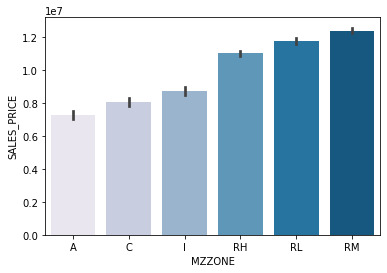

In [1005]:
#viewing the relationship and distribution between parking facility "MZZONE" feature and the target "SALES_PRICE"
chart_df=df.groupby("MZZONE")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

This plot shows the sales_price of the houses based on their zone. by seeing this plot we can say that all the "residentaial density zone"(RH,RM,RL) have higher SALES_PRICE.
Agriculture zone(A) have the low SALES_PRICE


In [1006]:
#finding the corelation between the feature "MZZONE" and the target "SALES_PRICE"
#converting categorical feature to numerical
cat_to_num_zone=df["MZZONE"].astype("category").cat.codes
#finding the corelation to see the relationship
zone_cor=np.corrcoef(cat_to_num_zone,df["SALES_PRICE"])
print("The feature 'MZZONE' and the target 'SALES_PRICE' have a  MODERATE POSITIVE corelation,beacuse the corelation value is",zone_cor[0][1])

The feature 'MZZONE' and the target 'SALES_PRICE' have a  MODERATE POSITIVE corelation,beacuse the corelation value is 0.42752559177003313


# DATA ENCODING

In [1007]:
#creating a copy of df before encoding
before_encoding=df.copy(deep=True)

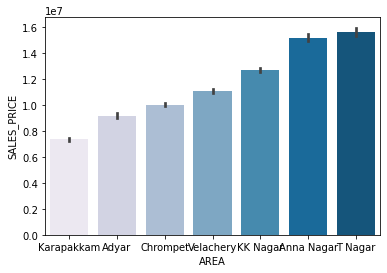

In [1008]:
#checking if there is order in the feature "AREA":
orderdf=df.groupby(["AREA"])["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="AREA",y="SALES_PRICE",data=df,order=orderdf,palette="PuBu");

From the graph we can see an increasing order,so we can order the "AREA" by applying nominal encoding method.

In [1009]:
#encoding "AREA" feature in ordinal order
df["AREA"]=df["AREA"].replace({"T Nagar":1,"Anna Nagar":2,"KK Nagar":3,"Velachery":4,"Chrompet":5,"Adyar":6,"Karapakkam":7})

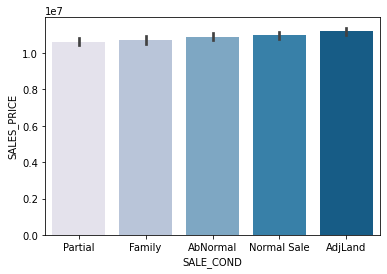

In [1010]:
#checking if there is order in the feature "SALE_COND":
orderdf=df.groupby(["SALE_COND"])["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df,order=orderdf,palette="PuBu");

By seeing the graph we can say that data are eqaully distributed,and there is no order in this categories,so we can use label or one hot encoding

In [1011]:
#encoding "SALE_COND" feature in label encoding 
lb=LabelEncoder()
df["SALE_COND"]=lb.fit_transform(df["SALE_COND"])

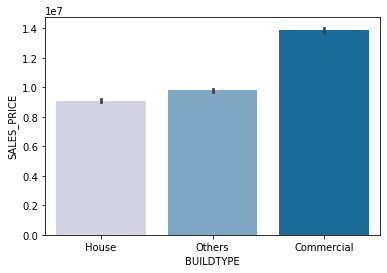

In [1012]:
#checking if there is order in the feature "BUILDTYPE":
chart_df=df.groupby("BUILDTYPE")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

By seeing the graph, we can say that there is no order, so we can apply label or one hot encoding

In [1013]:
##encoding "BUILDTYPE" feature in label encoding 
lb=LabelEncoder()
df["BUILDTYPE"]=lb.fit_transform(df["BUILDTYPE"])

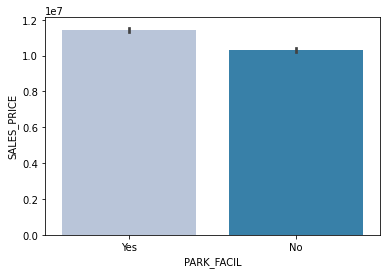

In [1014]:
#checking if there is order in the feature "PARK_FACIL":
sns.barplot(x="PARK_FACIL",y="SALES_PRICE",data=df,palette="PuBu");

This feature has only 2 categories and that is of yes or no category,so no order in this category,so we can do label or one hot encoding

In [1015]:
##encoding "PARK_FACIL" feature in label encoding 
lb=LabelEncoder()
df["PARK_FACIL"]=lb.fit_transform(df["PARK_FACIL"])

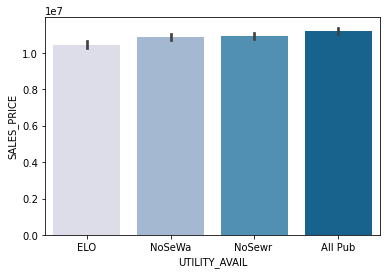

In [1016]:
#checking if there is order in the feature "UTILITY_AVAIL":
chart_df=df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

By seeing the graph we can say that data are eqaully distributed,so there is no order in this categories,so we can use label or one hot encoding

In [1017]:
##encoding "UTILITY_AVAIL" feature in label encoding 
lb=LabelEncoder()
df["UTILITY_AVAIL"]=lb.fit_transform(df["UTILITY_AVAIL"])

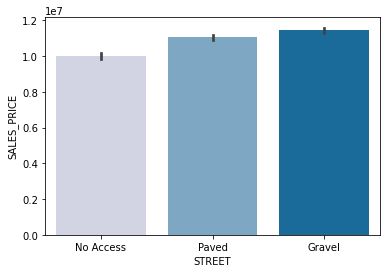

In [1018]:
#checking if there is order in the feature "STREET":
chart_df=df.groupby("STREET")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="STREET",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

In the above graph, we can say that there is a slight order in this categorical feature,so we apply ordinal encoding for this feature

In [1019]:
df["STREET"]=df["STREET"].replace({"No Access":3,"Paved":2,"Gravel":1})

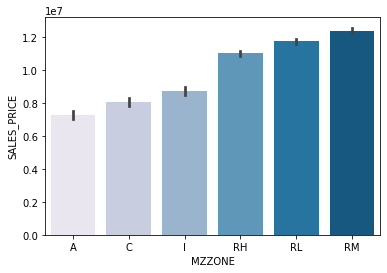

In [1020]:
chart_df=df.groupby("MZZONE")["SALES_PRICE"].mean().sort_values().index
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df,order=chart_df,palette="PuBu");

By seeing the graph we can say thet there is an order in this feature,so we can apply ordinal encoding to this feature

In [1021]:
df["MZZONE"]=df["MZZONE"].replace({"RM":1,"RL":2,"RH":3,"I":4,"C":5,"A":6})

In [1022]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

# DATA SPLITTING

In [1023]:
#splitting the data
x_df=df.drop(columns=["REG_FEE","COMMIS","SALES_PRICE","PRT_ID","DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"])
x=x_df
y=df["SALES_PRICE"]

In [1024]:
#spliting to train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5644, 13)
(1412, 13)
(5644,)
(1412,)


# MODEL BUILDING

LINEAR REGRESSION MODEL

In [1025]:
#building linear regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [1026]:
#EVALUATION METRICS
#performing r2 score
y_pred_lin=linreg.predict(x_test)
score_lin=r2_score(y_test,y_pred_lin)
score_lin

0.8054625689729925

In [1027]:
#PARAMETERS OF THE MODEL
#intercept of the model
intercept=linreg.intercept_
print("the intercept of the linear eqation is: ",intercept)

the intercept of the linear eqation is:  11916753.290476995


In [1028]:
#slope of the model
slope=linreg.coef_
features=df.drop(columns=["REG_FEE","COMMIS","SALES_PRICE"]).columns
for i in range(len(slope)):
    print("The slope of the feature",features[i].upper(),"is: ",slope[i] )

The slope of the feature PRT_ID is:  -561897.5450591262
The slope of the feature AREA is:  1481.4144766061163
The slope of the feature INT_SQFT is:  593.8096819121877
The slope of the feature DATE_SALE is:  -1537679.056544187
The slope of the feature DIST_MAINROAD is:  137844.45817360104
The slope of the feature N_BEDROOM is:  1756468.2461809285
The slope of the feature N_BATHROOM is:  -109560.11415187524
The slope of the feature N_ROOM is:  1035002.0852190179
The slope of the feature SALE_COND is:  -2007959.06956467
The slope of the feature PARK_FACIL is:  -88378.11115348017
The slope of the feature DATE_BUILD is:  -469386.93297328457
The slope of the feature BUILDTYPE is:  -580416.0027272389
The slope of the feature UTILITY_AVAIL is:  -18641.339641303413


K-NEAREST NEIGHBORS MODEL

In [1029]:
#scaling the data for using knn
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [1030]:
#BUILDING KNN MODEL
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [1031]:
#EVALUATION METRICS
y_pred_knn=knn.predict(x_test)
score_knn=r2_score(y_test,y_pred_knn)
score_knn

0.8864962874042686

In [1032]:
#tunning for the best hyperparameter(k)  value
iteration_knn=[]
cross_vals_knn_ht=[]
for i in range(3,21):
    knn_ht=KNeighborsRegressor(n_neighbors=i)
    knn_ht.fit(x_train,y_train)
    y_pred_knn_ht=knn_ht.predict(x_test)
    cross_score_knn_ht=np.mean(cross_val_score(knn_ht,x_train,y_train,cv=10))
    cross_vals_knn_ht.append(cross_score_knn_ht)
    iteration_knn.append(i)
knn_ht_vals=dict(zip(iteration_knn,cross_vals_knn_ht))
print(knn_ht_vals)

{3: 0.8765810578040731, 4: 0.8806038163928523, 5: 0.8823357475779444, 6: 0.8811863742883755, 7: 0.8785015273673432, 8: 0.8780846141780939, 9: 0.8755771922400376, 10: 0.8732592056700564, 11: 0.8704096749775474, 12: 0.8672073122545416, 13: 0.8646624676008251, 14: 0.8621361566633426, 15: 0.8603649636644614, 16: 0.8576909331555134, 17: 0.854848292190068, 18: 0.8535522381061288, 19: 0.8516023480738891, 20: 0.8498623296162158}


In [1033]:
max_knnval_score=max(knn_ht_vals.values())
position=list(knn_ht_vals.values()).index(max_knnval_score)
ht_value=list(knn_ht_vals.keys())
print("The hyper tuned learing_rate value with high validation score is:",ht_value[position],"with the validation score:",max_knnval_score)

The hyper tuned learing_rate value with high validation score is: 5 with the validation score: 0.8823357475779444


Since the best k value with high validation score is 8,so building the knn model with the k value 8

In [1034]:
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [1035]:
y_pred_knn=knn.predict(x_test)
score_knn=r2_score(y_test,y_pred_knn)
score_knn

0.8871985291258896

DESCION TREE MODEL

In [1036]:
#BUILDING THE DESCION TREE MODEL
dtm=DecisionTreeRegressor(max_depth=2)
dtm.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [1037]:
pred_y_dtm=dtm.predict(x_test)
score_dtm=r2_score(y_test,pred_y_dtm)
score_dtm

0.6910831058601635

In [1038]:
#using cross validation finding the best hyperparamter (max_depth) value
cross_scores_dept=[]
iteration=[]
for i in [3,4,5,6,7,8,9,10,20,40]:
    dt_max_depth=DecisionTreeRegressor(max_depth=i)
    dt_max_depth.fit(x_train,y_train)
    cross_score_dt_ht=cross_val_score(dt_max_depth,x,y,cv=10)
    cross_scores_dept.append(np.mean(cross_score_dt_ht))
    iteration.append(i)
    
max_dept_i=dict(zip(iteration,cross_scores_dept))
print(max_dept_i)
    

{3: 0.8015362282997085, 4: 0.8814509474192139, 5: 0.9153591211941865, 6: 0.9357556001143708, 7: 0.9506984440161684, 8: 0.9619910431858711, 9: 0.9689897385509239, 10: 0.9719114233784255, 20: 0.9726373348021211, 40: 0.9720004797468349}


In [1039]:
#taking the max_val_cross's depth_value
max_score=max(max_dept_i.values())
position=list(max_dept_i.values()).index(max_score)
apt_dept_value=list(max_dept_i.keys())
print("The hyper tunned depth_value with high val_score is:",apt_dept_value[position],"with the val score:",max_score)

The hyper tunned depth_value with high val_score is: 20 with the val score: 0.9726373348021211


In [1040]:
#building descion tree model with depth value 10
dt=DecisionTreeRegressor(max_depth=apt_dept_value[position])
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [1041]:
pred_y_dt=dt.predict(x_test)
score_dt=r2_score(y_test,pred_y_dt)
score_dt

0.9726396425345323

RANDOM FOREST MODEL

In [1042]:
#building random forest model
# max_dept=log2(number of features)
dept=round(math.log2(len(x_train)))
rf=RandomForestRegressor(n_estimators=50,max_depth=dept,max_features="sqrt")
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', n_estimators=50)

In [1043]:
y_pred_rf=rf.predict(x_test)
score_rf=r2_score(y_test,y_pred_rf)
score_rf

0.9807788412038336

XTREME GRADENT BOOSTING MODEL

In [1044]:
#building xgboost model
xgm=xgboost.XGBRegressor(max_depth=dept,learning_rate=0.03,n_estimator=100,verbosity=0)
xgm.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=100,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [1045]:
y_pred_xgm=xgm.predict(x_test)
score_xgm=r2_score(y_test,y_pred_xgm)
score_xgm

0.9645731266433303

In [1046]:
#tunning the hyper parameter(learning rate)
cross_vals_xg_ht=[]
iteration=[]
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
    xg_ht=xgboost.XGBRegressor(max_depth=dept,learning_rate=i,n_estimator=100,verbosity=0)
    xg_ht.fit(x_train,y_train)
    cross_score_xg_ht=np.mean(cross_val_score(xg_ht,x_train,y_train,cv=10))
    cross_vals_xg_ht.append(cross_score_xg_ht)
    iteration.append(i)
xg_ht_vals=dict(zip(iteration,cross_vals_xg_ht))
print(xg_ht_vals)

{0.01: -0.3273349653678292, 0.02: 0.8006298715571075, 0.03: 0.9624260905705635, 0.04: 0.9877731962606278, 0.05: 0.9926860541182959, 0.06: 0.9938552896956937, 0.07: 0.994286720284752, 0.08: 0.9944596035964193, 0.09: 0.9945886792508645, 0.1: 0.994402652233356}


In [1047]:
max_xgval_score=max(xg_ht_vals.values())
position=list(xg_ht_vals.values()).index(max_xgval_score)
ht_value=list(xg_ht_vals.keys())
print("The hyper tuned learing_rate value with high validation score is:",ht_value[position],"with the validation score:",max_xgval_score)

The hyper tuned learing_rate value with high validation score is: 0.09 with the validation score: 0.9945886792508645


In [1048]:
#building xgboost model with the tunned hyperparameter (learning_rate=0.09)
xgb=xgboost.XGBRegressor(max_depth=dept,learning_rate=0.09,n_estimator=100,verbosity=0)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=100,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [1049]:
y_pred_xgb=xgb.predict(x_test)
score_xgb=r2_score(y_test,y_pred_xgb)
score_xgb

0.9951106194485314

# CROSS VALIDATION FOR ALL MODELS

In [1050]:
cross_score_lin=cross_val_score(linreg,x_train,y_train,cv=10).mean()
cross_score_dt=cross_val_score(dt,x_train,y_train,cv=10).mean()
cross_score_rf=cross_val_score(rf,x_train,y_train,cv=10).mean()
cross_score_xg=cross_val_score(xgb,x_train,y_train,cv=10).mean()

In [1058]:
print("Cross value score of linear regression model is:",cross_score_lin)
print("Cross value score of descision tree model is:",cross_score_dt)
print("Cross value score of random forest model is:",cross_score_rf)
print("Cross value score of extreme gradient boosting  model is:",cross_score_xg)

Cross value score of linear regression model is: 0.8078556558089932
Cross value score of descision tree model is: 0.9675135290599757
Cross value score of random forest model is: 0.9780058516546509
Cross value score of extreme gradient boosting  model is: 0.9945886792508645


In [1059]:
#getting the maximum validation score
max_score=max([cross_score_lin,cross_score_dt,cross_score_rf,cross_score_xg])
print("The maximum validation score out of all model is",max_score,"which belongs to XGBOOST MODEL")

The maximum validation score out of all model is 0.9945886792508645 which belongs to XGBOOST MODEL


Out of all model XGBOOST is the best model, which gives best r2score and best cross validation score too

# FEATURE IMPORTANCE

In [1053]:
#As xgboost is the best model out of all,getting the features in that model
imp_features_xgb=xgb.feature_importances_
important_features=dict(zip(x.columns,imp_features_xgb))
for i in important_features:
    print("The feature value of",i,"is",important_features[i])

The feature value of AREA is 0.21713865
The feature value of INT_SQFT is 0.016005049
The feature value of DIST_MAINROAD is 9.283967e-05
The feature value of N_BEDROOM is 0.04518877
The feature value of N_BATHROOM is 0.012276516
The feature value of N_ROOM is 0.102357246
The feature value of SALE_COND is 0.00088444754
The feature value of PARK_FACIL is 0.012657345
The feature value of BUILDTYPE is 0.5587634
The feature value of UTILITY_AVAIL is 0.00033066774
The feature value of STREET is 0.0085363295
The feature value of MZZONE is 0.025071483
The feature value of AGE_OF_BUILDING is 0.00069729437


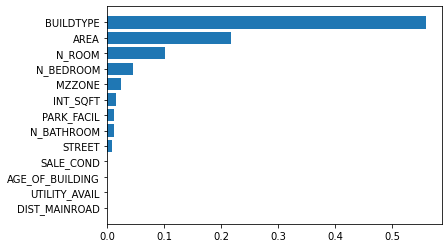

In [1054]:
#visualizing the important features
sorted_idx=xgb.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],xgb.feature_importances_[sorted_idx]);

# SOLUTION TO PROBLEM STATEMENT

 1.Which factor makes more money?

By building models and fetching the important features,we came to know that the features "BUILDTYPE" and "AREA" are important.

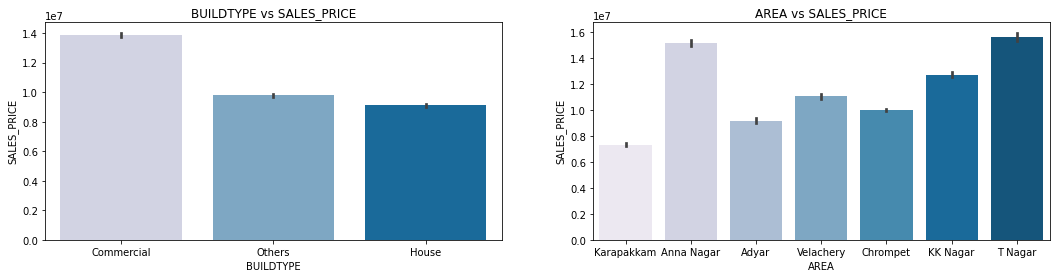

In [1055]:
fig,axis=plt.subplots(1,2,figsize=(18,4))
sns.barplot(x=before_encoding["BUILDTYPE"],y=before_encoding["SALES_PRICE"],palette="PuBu",ax=axis[0]).set(title="BUILDTYPE vs SALES_PRICE");
sns.barplot(x="AREA",y="SALES_PRICE",data=before_encoding,palette="PuBu",ax=axis[1]).set(title="AREA vs SALES_PRICE");

By seeing the graph we can say that in BUILDTYPE commercial building gives more salesprice and in AREA TNagar and Anna Nagar gives the highest salesprice

So if you want to make more money, it is recommened to build a "commercial" building in the area "TNagar" or "Anna Nagar".

2.What is the range of price to negotiate?

The price range is calculated based on the predicted house price

In [1056]:
#lets predict a price of a random house
inputs=[[7,1004,131,1,1,3,0,1,0,0,2,6,44]]
pred=xgb.predict(inputs)
predicted_price=pred[0]
print("The predicted house price is Rs:",round(predicted_price))

The predicted house price is Rs: 7244098


In [1057]:
#range to negotiate
#we can negotiate upto 5 percent of the final price
final=predicted_price-predicted_price*5/100
print("You can negotiate aproximatly from Rs:",round(final),"to Rs:",round(predicted_price))

You can negotiate aproximatly from Rs: 6881893 to Rs: 7244098
